In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image

(5, 64, 64, 3)
(64, 64, 3)


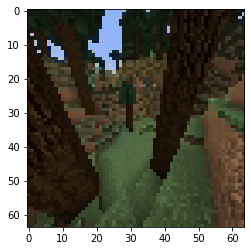

In [3]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
file = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
file = np.array(file[-1792:][:5]).astype(np.uint8)
print(file.shape)
#for i in range(len(file)):
    #processed = np.append(np.array(Image.fromarray(file[i], "RGB").convert("L")), processed)
processed = file.reshape(5, 64, 64, 3)
test = np.array([processed[-1:]])
processed = processed[:-1]
print(processed[0].shape)
plt.imshow(processed[-1])

In [52]:
cnn_encoder = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=2, padding="same", activation="tanh", input_shape=[64,64,3]),
    keras.layers.Conv2D(5, kernel_size=2, padding="same", activation="tanh")
])

cnn_decoder = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=2, padding="same", activation="tanh", input_shape=[64,64,5]),
    keras.layers.Conv2D(3, kernel_size=2, padding="same", activation="sigmoid"),
    keras.layers.Reshape([64,64,3])
])

cnn_autoencoder = keras.models.Sequential([cnn_encoder, cnn_decoder])

for layer in cnn_encoder.layers:
    print(layer.get_output_at(0).get_shape().as_list())
    
for layer in cnn_decoder.layers:
    print(layer.get_output_at(0).get_shape().as_list())

cnn_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))
history = cnn_autoencoder.fit(processed*255, processed*255, epochs=100, validation_data=(processed*255, processed*255))
cnn_autoencoder.summary()

[None, 64, 64, 32]
[None, 64, 64, 5]
[None, 64, 64, 32]
[None, 64, 64, 3]
[None, 64, 64, 3]
Epoch 1/100
1/1 [==============================] - 1s 550ms/step - loss: 45.1225 - val_loss: 2831.7793
Epoch 2/100
1/1 [==============================] - 0s 179ms/step - loss: 2831.7788 - val_loss: 2834.4143
Epoch 3/100
1/1 [==============================] - 0s 175ms/step - loss: 2834.4136 - val_loss: 2832.1416
Epoch 4/100
1/1 [==============================] - 0s 172ms/step - loss: 2832.1411 - val_loss: 2832.1416
Epoch 5/100
1/1 [==============================] - 0s 187ms/step - loss: 2832.1411 - val_loss: 2832.1416
Epoch 6/100
1/1 [==============================] - 0s 177ms/step - loss: 2832.1411 - val_loss: 2832.1416
Epoch 7/100
1/1 [==============================] - 0s 184ms/step - loss: 2832.1411 - val_loss: 2832.1416
Epoch 8/100
1/1 [==============================] - 0s 173ms/step - loss: 2832.1406 - val_loss: 2832.1416
Epoch 9/100
1/1 [==============================] - 0s 193ms/step - los

1/1 [==============================] - 0s 112ms/step - loss: 2832.1406 - val_loss: 2832.1416
Epoch 78/100
1/1 [==============================] - 0s 107ms/step - loss: 2832.1416 - val_loss: 2832.1416
Epoch 79/100
1/1 [==============================] - 0s 96ms/step - loss: 2832.1416 - val_loss: 2832.1416
Epoch 80/100
1/1 [==============================] - 0s 99ms/step - loss: 2832.1416 - val_loss: 2832.1416
Epoch 81/100
1/1 [==============================] - 0s 96ms/step - loss: 2832.1406 - val_loss: 2832.1416
Epoch 82/100
1/1 [==============================] - 0s 98ms/step - loss: 2832.1406 - val_loss: 2832.1416
Epoch 83/100
1/1 [==============================] - 0s 99ms/step - loss: 2832.1416 - val_loss: 2832.1416
Epoch 84/100
1/1 [==============================] - 0s 110ms/step - loss: 2832.1411 - val_loss: 2832.1416
Epoch 85/100
1/1 [==============================] - 0s 102ms/step - loss: 2832.1406 - val_loss: 2832.1416
Epoch 86/100
1/1 [==============================] - 0s 101ms/ste

[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

  ...

  [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.000000

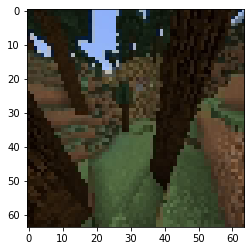

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AI vision:


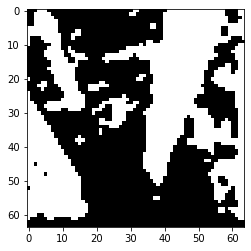

In [53]:
image = cnn_autoencoder.predict(test.reshape(-1,64,64,3))
print(image)
#Original image
print("Original image:")
plt.imshow(test.reshape(64,64,3))
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(image.reshape(64,64,3)*255)
plt.show()

[None, 100]
[None, 30]
[None, 32768]
[None, 16, 16, 128]
[None, 16, 16, 128]
[None, 16, 16, 32]
[None, 16, 16, 128]
[None, 16, 16, 128]
[None, 32, 32, 64]
[None, 32, 32, 64]
[None, 64, 64, 3]
[None, 32, 32, 128]
[None, 32, 32, 128]
[None, 16, 16, 64]
[None, 16, 16, 64]
[None, 16384]
[None, 1]
uint8
<PrefetchDataset shapes: (1, 64, 64, 3), types: tf.uint8>
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


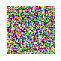

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


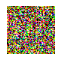

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


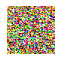

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 64, 64, 3)
(2, 1)


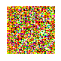

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


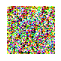

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


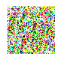

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


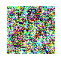

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


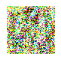

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


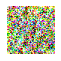

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


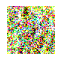

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


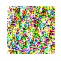

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


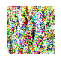

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


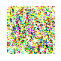

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


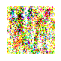

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


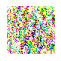

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


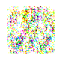

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


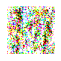

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


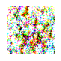

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


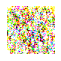

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


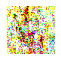

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


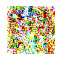

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


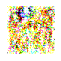

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


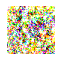

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


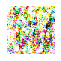

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


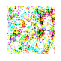

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


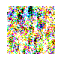

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


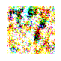

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


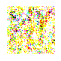

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


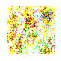

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


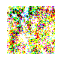

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


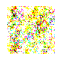

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


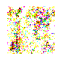

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


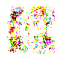

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


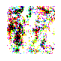

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


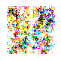

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


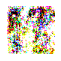

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


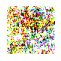

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


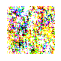

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


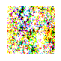

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


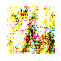

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


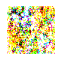

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


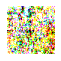

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


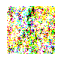

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 64, 64, 3)
(2, 1)


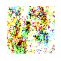

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


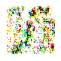

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


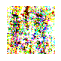

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 64, 64, 3)
(2, 1)


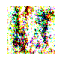

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


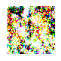

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


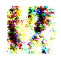

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


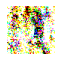

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


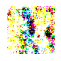

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


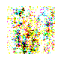

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


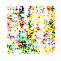

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


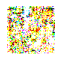

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


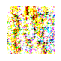

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


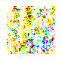

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


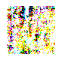

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


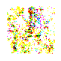

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


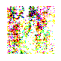

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


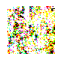

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


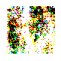

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


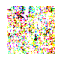

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


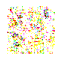

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


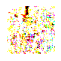

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


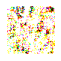

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


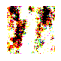

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


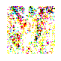

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


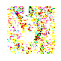

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


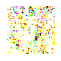

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


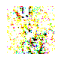

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


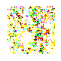

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


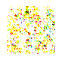

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


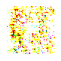

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


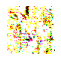

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


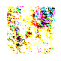

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


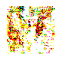

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


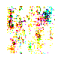

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


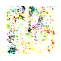

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


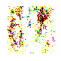

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


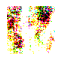

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


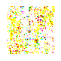

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


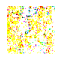

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


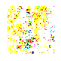

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


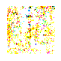

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


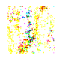

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


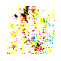

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


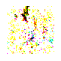

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


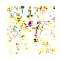

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


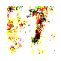

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


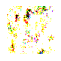

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


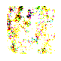

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


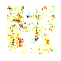

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


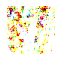

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


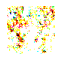

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


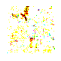

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


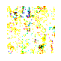

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


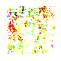

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


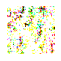

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


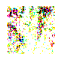

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


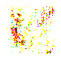

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


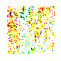

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


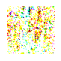

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


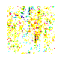

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


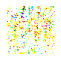

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


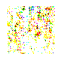

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


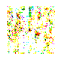

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


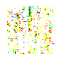

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


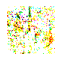

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


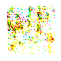

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


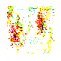

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


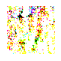

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


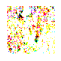

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


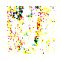

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


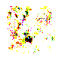

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


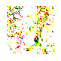

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


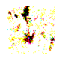

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


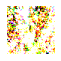

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


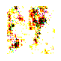

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


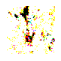

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


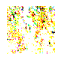

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


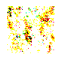

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


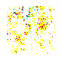

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


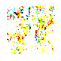

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 64, 64, 3)
(2, 1)


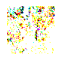

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


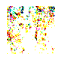

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


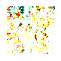

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


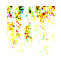

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


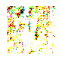

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


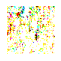

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


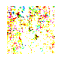

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


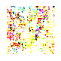

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 64, 64, 3)
(2, 1)


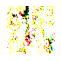

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


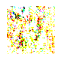

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


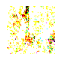

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


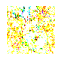

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


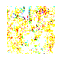

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


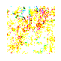

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


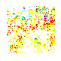

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


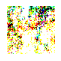

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


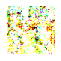

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


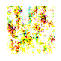

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


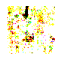

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


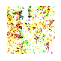

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


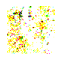

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


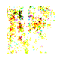

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


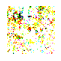

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


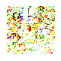

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


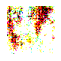

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


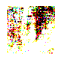

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


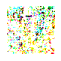

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


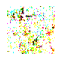

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


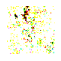

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


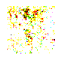

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


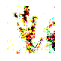

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


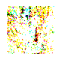

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


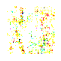

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


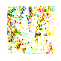

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


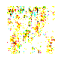

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


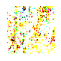

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


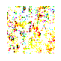

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


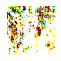

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


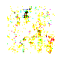

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


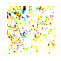

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


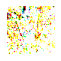

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


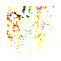

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


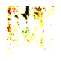

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


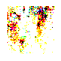

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


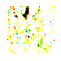

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


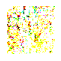

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


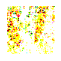

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


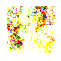

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


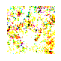

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


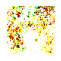

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


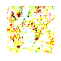

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


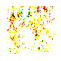

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


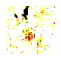

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


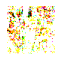

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


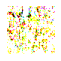

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


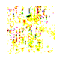

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


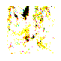

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


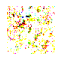

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


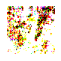

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


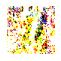

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


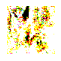

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


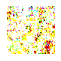

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


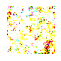

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


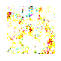

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


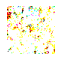

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


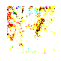

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


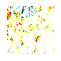

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


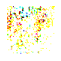

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


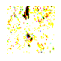

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


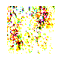

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


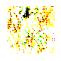

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


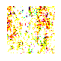

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


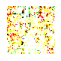

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


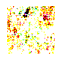

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


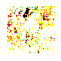

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


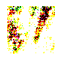

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


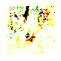

In [28]:
cnn_codings = 200

cnn_gen = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[cnn_codings]),
    keras.layers.Dense(30),
    keras.layers.Dense(16*16*128),
    keras.layers.Reshape([16,16,128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=2, strides=1, padding="same", activation="tanh"),
    keras.layers.Conv2D(128, kernel_size=5, strides=1, padding="same", activation="tanh"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="same",
                                activation="tanh"),
    keras.layers.Conv2DTranspose(64, kernel_size=2, strides=1, padding="same",
                                activation="tanh"),
    keras.layers.Conv2DTranspose(3, kernel_size=2, strides=2, padding="same",
                                 activation=keras.layers.LeakyReLU(0.2))
])

cnn_dis = keras.models.Sequential([
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2), 
                       input_shape=[64,64,3]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

for layer in cnn_gen.layers:
    print(layer.get_output_at(0).get_shape().as_list())
for layer in cnn_dis.layers:
    print(layer.get_output_at(0).get_shape().as_list())

cnn_gan = keras.models.Sequential([cnn_gen, cnn_dis])
cnn_dis.compile(loss="binary_crossentropy", optimizer="rmsprop")
cnn_dis.trainable = False
cnn_gan.compile(loss="binary_crossentropy", optimizer="rmsprop")
batch_size = 1
processed = np.array(processed).reshape(-1,64,64,3)
dataset = tf.data.Dataset.from_tensor_slices(processed)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
print(processed.dtype)
print(dataset)

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

def train_gan(gan, dataset, batch_size, codings_size, n_epochs=200):
    cnn_gen, cnn_dis = cnn_gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            
            #training the discriminator
            X_batch = tf.cast(X_batch, tf.float32)
            noise = tf.random.normal(shape=[batch_size,codings_size])
            generated_images = cnn_gen(noise)*255
            
            #print(generated_images[0][0][0])
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            print(X_fake_and_real.shape)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            print(y1.shape)
            cnn_dis.trainable = True
            cnn_dis.train_on_batch(X_fake_and_real, y1)
            
            #training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            cnn_dis.trainable = False
            cnn_gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                    
        plt.show()
        
train_gan(cnn_gan, dataset, batch_size, cnn_codings)

Original image:


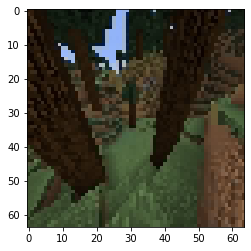

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AI vision:


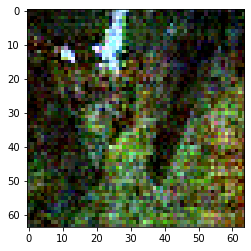

In [29]:
#GAN tester
noise = tf.random.normal(shape=[batch_size, cnn_codings])
gan_img = cnn_gen.predict(noise)

print("Original image:")
plt.imshow(processed[0].reshape(64,64,3))
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(gan_img.reshape(64,64,3))
plt.show()